In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
%matplotlib inline

In [4]:
N_voltages  = 2000
step_size   = 1e-10
time        = step_size*np.arange(1,N_voltages)*1e9
cap         = 4
data        = [{seed : pd.read_csv(f"data/Nx=7_Ny=7_Nz=1_Ne=8_{std_cap}_{seed}.csv") for seed in range(0,10)} for std_cap in [0.5,1.0,1.5,2.0]]

In [7]:
data[3][4]

,E0,E1,E2,E3,E4,E5,E6,G,Eq_Jumps,Jumps,Current,Error
0,0.1,0.069294,0.056621,0.068051,0.048633,0.028672,0.034763,0.0,0.0,1.440,0.034763,0.000378
1,0.1,0.069349,0.056604,0.068076,0.048612,0.028760,0.034762,0.0,0.0,1.434,0.034762,0.000410
2,0.1,0.069316,0.056627,0.068093,0.048654,0.028776,0.034628,0.0,0.0,1.420,0.034628,0.000414
3,0.1,0.069353,0.056682,0.067949,0.048810,0.028773,0.034787,0.0,0.0,1.438,0.034787,0.000378
4,0.1,0.069327,0.056679,0.067904,0.048918,0.028794,0.034800,0.0,0.0,1.426,0.034800,0.000385
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.1,0.069229,0.056829,0.068294,0.048977,0.028548,0.034703,0.0,0.0,1.400,0.034703,0.000394
1995,0.1,0.069142,0.056801,0.068283,0.048838,0.028522,0.034749,0.0,0.0,1.426,0.034749,0.000379
1996,0.1,0.069215,0.056770,0.068212,0.048919,0.028469,0.034932,0.0,0.0,1.384,0.034932,0.000359
1997,0.1,0.069326,0.056787,0.068143,0.049011,0.028639,0.034672,0.0,0.0,1.362,0.034672,0.000411


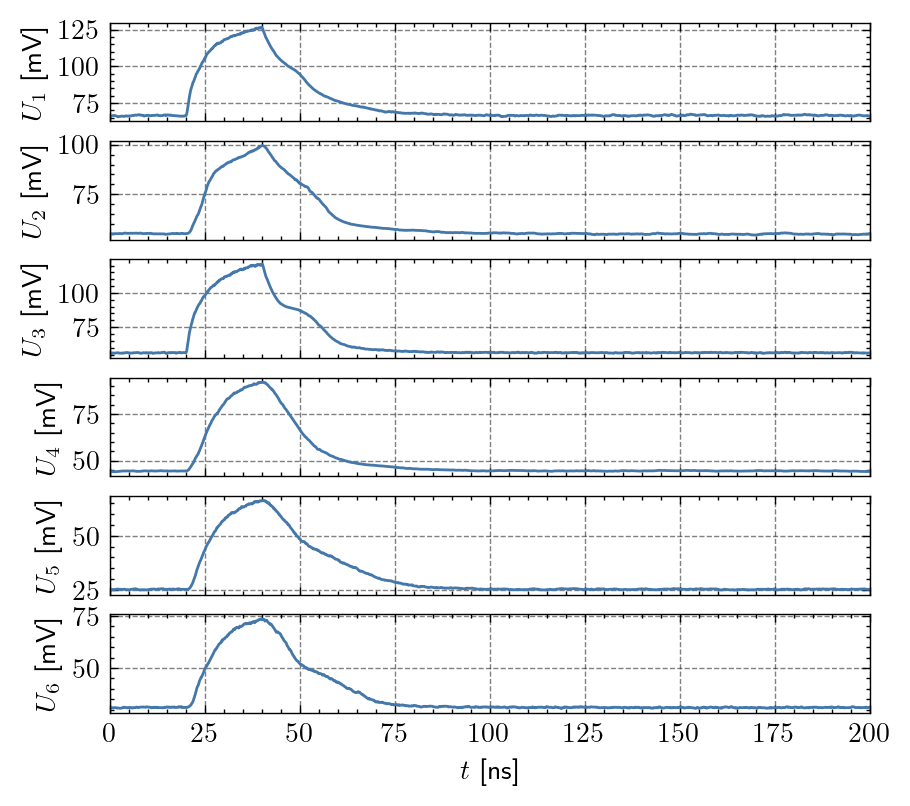

In [41]:
seed    = 5

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    fig.set_figheight(fig.get_figheight()*2.0)

    for i in range(1,7):

        ax      = fig.add_subplot(7,1,i)
        values  = data[3][seed][f'E{i}']*1000

        ax.plot(time, values)#, label='$N_{NP} ='+f' {N}$')
        ax.set_ylabel(f"$U_{i}$ [mV]")
        ax.set_xlim(0,200)
        
        if i != 6:
            ax.set_xticklabels("")

    ax.set_xlabel("$t$ [ns]")

    fig.savefig(f"plots/step_response_cap_{seed}.svg", transparent=True)

In [35]:
starts  = 400
ends    = 700
cvs     = {}

for i, std_cap in enumerate([0.5,1.0,1.5,2.0]):
    
    means   = []
    stds    = []
    
    for seed in range(10):
        for j in range(1,7):
            means.append((data[i][seed].loc[starts:ends,f'E{j}'] - data[i][seed].loc[0:100,f'E{j}'].mean()).mean())
            stds.append((data[i][seed].loc[starts:ends,f'E{j}'] - data[i][seed].loc[0:100,f'E{j}'].mean()).std())

    cvs[std_cap]  = [stds[i]/means[i] for i in range(len(means))]

<Axes: >

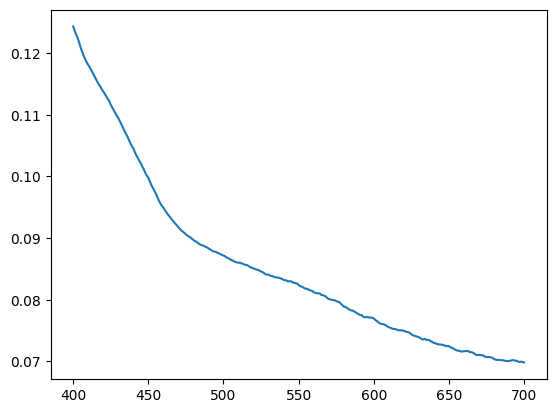

In [40]:
data[3][6].loc[starts:ends,'E3'].plot()

In [37]:
df_cv = pd.DataFrame()
for key, vals in cvs.items():
    df_cv[key] = vals
df_cv

,0.5,1.0,1.5,2.0
0,0.738193,0.729803,0.672194,0.682789
1,0.621118,0.614367,0.536156,0.590005
2,0.775982,0.721639,0.659331,0.610314
3,0.882049,0.750106,0.671881,0.541793
4,0.629942,0.627160,0.692519,0.621733
5,0.611404,0.608618,0.697273,0.789160
6,0.710658,0.828405,0.719674,0.762953
7,0.556045,0.479242,0.656154,0.625653
8,0.762864,0.689132,0.637902,0.745838
9,0.954500,0.843305,0.884983,1.018361


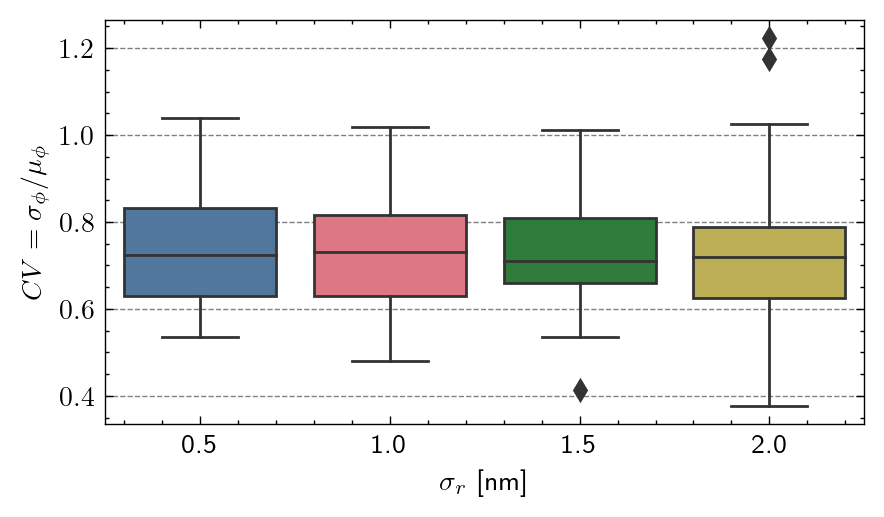

In [38]:
with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)

    ax  = fig.add_subplot()
    ax  = sns.boxplot(df_cv)
    ax.set_xlabel("$\sigma_{r}$ [nm]")
    ax.set_ylabel("$CV = \sigma_\phi / \mu_\phi$")
    fig.savefig(f"plots/cv_cap.svg", transparent=True)